In [17]:
from google.colab import files
uploaded = files.upload()


Saving sample_travel_reviews.csv to sample_travel_reviews.csv



Dataset Head:
   Customer_ID        Review_Text  Rating  Customer_Age     Tour_Package  \
0            1  Great experience!     5.0          25.0  Beach Adventure   
1            2          Loved it!     4.0          34.0        City Tour   
2            3            Not bad     3.0          45.0    Mountain Hike   
3            4                NaN     NaN           NaN        City Tour   
4            5   Worst trip ever!     1.0          29.0           Safari   

   Package_Price  
0            500  
1            700  
2            650  
3            600  
4           1200  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_ID    22 non-null     int64  
 1   Review_Text    17 non-null     object 
 2   Rating         17 non-null     float64
 3   Customer_Age   16 non-null     float64
 4   Tour_Package   22 non-null  

<ipython-input-19-a929852393cd>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


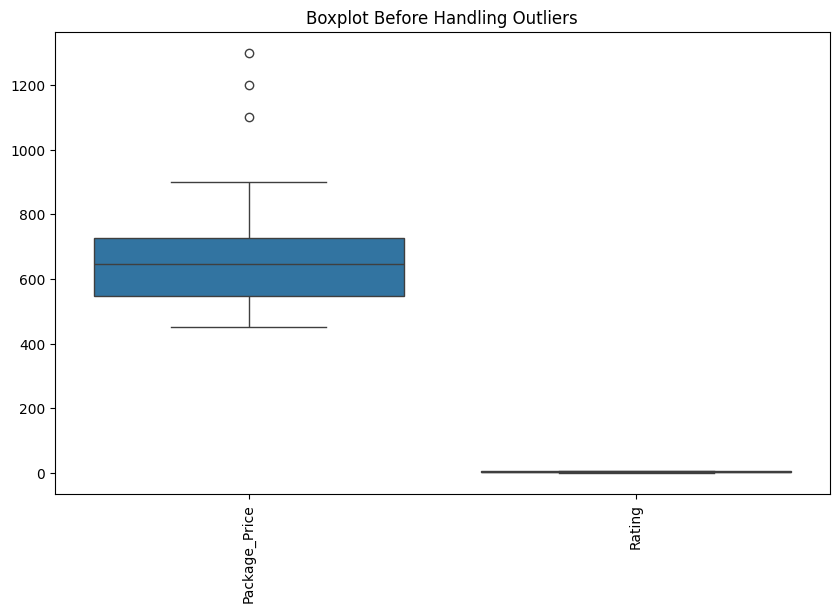


Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_ID    20 non-null     int64  
 1   Review_Text    20 non-null     object 
 2   Rating         20 non-null     float64
 3   Customer_Age   20 non-null     float64
 4   Tour_Package   20 non-null     int64  
 5   Package_Price  20 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.1+ KB
None

Missing Values After Cleaning:
Customer_ID      0
Review_Text      0
Rating           0
Customer_Age     0
Tour_Package     0
Package_Price    0
dtype: int64

Cleaned dataset saved as cleaned_travel_reviews.csv


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from textblob import TextBlob

# Load the dataset
df = pd.read_csv("sample_travel_reviews.csv")  # Replace with actual file name

# Display basic information
print("\nDataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Handle Missing Values
print("\nMissing Values Count:")
print(df.isna().sum())

# Impute missing numerical values
for col in ['Customer_Age', 'Rating']:
    df[col].fillna(df[col].median(), inplace=True)

# Handle missing textual data using NLP techniques
def fill_missing_text(text):
    if pd.isna(text):
        return "No review provided"
    return text

df['Review_Text'] = df['Review_Text'].apply(fill_missing_text)

# Detect and Remove Duplicates
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate Records Found: {duplicate_count}")
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)

# Standardize Rating values
df['Rating'] = df['Rating'].clip(1, 5)

# Correct spelling inconsistencies in Tour_Package names
def correct_spelling(text):
    return str(TextBlob(text).correct()) if pd.notna(text) else text

df['Tour_Package'] = df['Tour_Package'].apply(correct_spelling)

# Identify and Handle Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Package_Price', 'Rating']])
plt.title("Boxplot Before Handling Outliers")
plt.xticks(rotation=90)
plt.show()

# Capping outliers using IQR method
for col in ['Package_Price', 'Rating']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Convert categorical data into numerical format
le = LabelEncoder()
df['Tour_Package'] = le.fit_transform(df['Tour_Package'])

# Data Validation
print("\nFinal Dataset Info:")
print(df.info())
print("\nMissing Values After Cleaning:")
print(df.isna().sum())

# Save cleaned dataset
df.to_csv("cleaned_travel_reviews.csv", index=False)
print("\nCleaned dataset saved as cleaned_travel_reviews.csv")
